# Chaikin Oscillator

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:chaikin_oscillator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2016-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2.77,2.82,2.63,2.77,2.77,32516800
2016-01-05,2.77,2.80,2.64,2.75,2.75,12972300
2016-01-06,2.66,2.71,2.47,2.51,2.51,23759400
2016-01-07,2.43,2.48,2.26,2.28,2.28,22203500
2016-01-08,2.36,2.42,2.10,2.14,2.14,31822400


In [3]:
df['MF_Multiplier'] = (2*df['Adj Close']-df['Low']-df['High'])/(df['High']-df['Low'])
df['MF_Volume'] = df['MF_Multiplier']*df['Volume']
df['ADL'] = df['MF_Volume'].cumsum()
df = df.drop(['MF_Multiplier','MF_Volume'],axis=1)

In [4]:
df['ADL_3_EMA'] = df['ADL'].ewm(ignore_na=False,span=3,min_periods=2,adjust=True).mean()
df['ADL_10_EMA'] = df['ADL'].ewm(ignore_na=False,span=10,min_periods=9,adjust=True).mean()
df['Chaikin_Oscillator'] = df['ADL_3_EMA'] - df['ADL_10_EMA']
df = df.drop(['ADL','ADL_3_EMA','ADL_10_EMA'],axis=1)

In [5]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,Chaikin_Oscillator
Date,,,,,,,
2016-01-04,2.77,2.82,2.63,2.77,2.77,32516800,NaN
2016-01-05,2.77,2.80,2.64,2.75,2.75,12972300,NaN
2016-01-06,2.66,2.71,2.47,2.51,2.51,23759400,NaN
2016-01-07,2.43,2.48,2.26,2.28,2.28,22203500,NaN
2016-01-08,2.36,2.42,2.10,2.14,2.14,31822400,NaN
2016-01-11,2.16,2.36,2.12,2.34,2.34,19623600,NaN
2016-01-12,2.40,2.46,2.28,2.39,2.39,17986100,NaN
2016-01-13,2.40,2.45,2.21,2.25,2.25,12749700,NaN
2016-01-14,2.29,2.35,2.21,2.21,2.21,15666600,-1.058306e+07


Text(0.5,0,'Date')

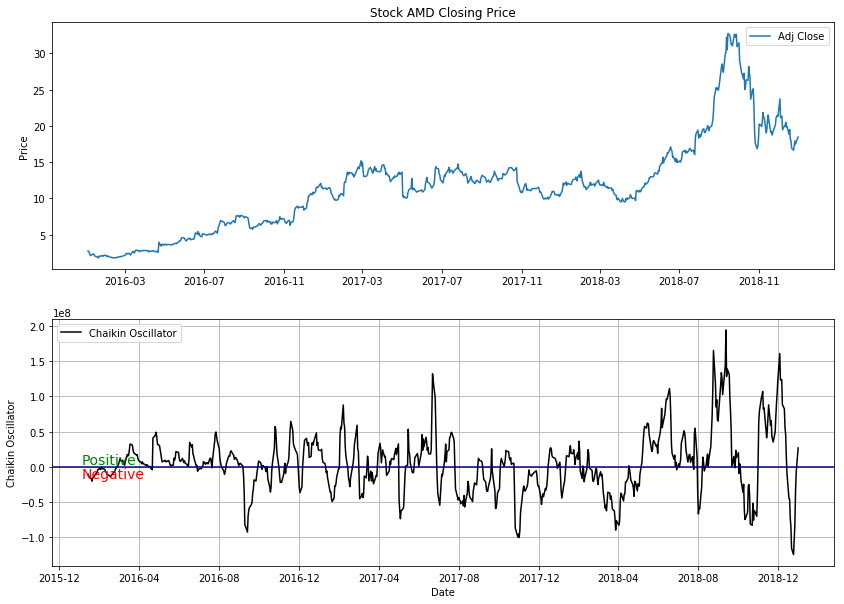

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Chaikin_Oscillator'], label='Chaikin Oscillator', color='black')
ax2.axhline(y=0, color='darkblue')
ax2.text(s='Positive', x=df.index[0], y=1, verticalalignment='bottom', fontsize=14, color='green')
ax2.text(s='Negative', x=df.index[0], y=1, verticalalignment='top', fontsize=14, color='red')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Chaikin Oscillator')
ax2.set_xlabel('Date')

## Candlestick with Chaikin Oscillator

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Chaikin_Oscillator,VolumePositive
0,735967.0,2.77,2.82,2.63,2.77,2.77,32516800,NaN,False
1,735968.0,2.77,2.80,2.64,2.75,2.75,12972300,NaN,False
2,735969.0,2.66,2.71,2.47,2.51,2.51,23759400,NaN,False
3,735970.0,2.43,2.48,2.26,2.28,2.28,22203500,NaN,False
4,735971.0,2.36,2.42,2.10,2.14,2.14,31822400,NaN,False


Text(0.5,0,'Date')

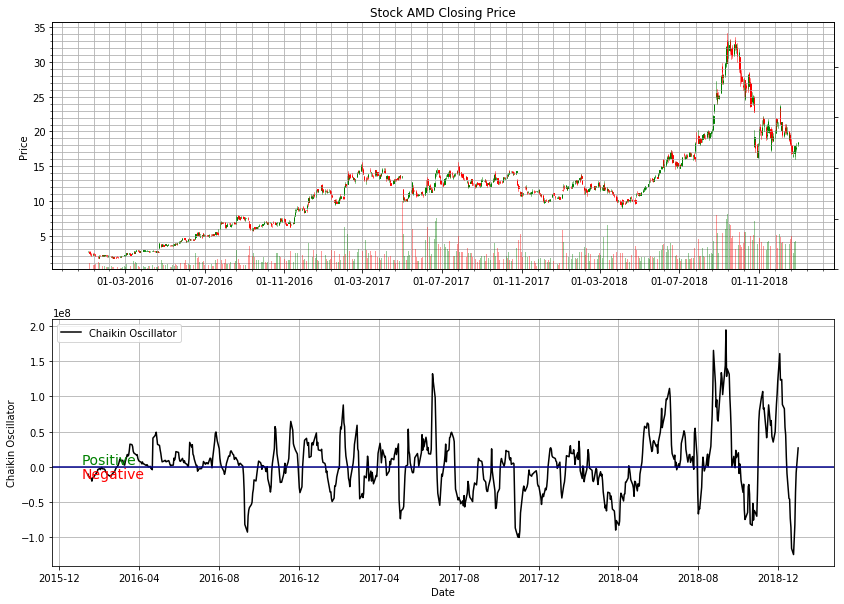

In [8]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Chaikin_Oscillator'], label='Chaikin Oscillator', color='black')
ax2.axhline(y=0, color='darkblue')
ax2.text(s='Positive', x=dfc.Date[0], y=1, verticalalignment='bottom', fontsize=14, color='green')
ax2.text(s='Negative', x=dfc.Date[0], y=1, verticalalignment='top', fontsize=14, color='red')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Chaikin Oscillator')
ax2.set_xlabel('Date')